### Imports et installations

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#!pip install -q panda
#!pip install -q openpyxl

### Monter votre google drive

In [3]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
#!mkdir -p drive -v
#!google-drive-ocamlfuse drive

In [4]:
import sklearn

cwd = os.getcwd()
dir_path  = os.path.join(cwd, 'drive/My Drive/M2/DataScience/tp1/GES2012/')
input_file_path = os.path.join(dir_path, 'PERSON.TXT')

input_data = pd.read_csv(input_file_path, delimiter='\t')
print (input_data)

             CASENUM  VEH_NO  PER_NO  SEX_IM  ...  P_SF1  P_SF2  P_SF3  LOCATION
0       201210432623       1       1       1  ...      0      0      0         0
1       201210432623       2       1       2  ...      0      0      0         0
2       201210432628       1       1       1  ...      0      0      0         0
3       201210432628       1       2       2  ...      0      0      0         0
4       201210432628       2       1       2  ...      0      0      0         0
5       201210432637       1       1       1  ...      0      0      0         0
6       201210432637       1       2       2  ...      0      0      0         0
7       201210432654       1       1       2  ...      0      0      0         0
8       201210432654       1       2       2  ...      0      0      0         0
9       201210432654       2       1       2  ...      0      0      0         0
10      201210432654       3       1       2  ...      0      0      0         0
11      201210432656       1

### Manipulation du data frame 

In [5]:
input_data.head()
input_data.describe()
input_data.index
input_data.INJ_SEV.value_counts()
input_data.iloc[0,:]

,CASENUM,VEH_NO,PER_NO,SEX_IM,INJSEV_IM,EJECT_IM,PERALCH_IM,SEAT_IM,AGE_IM,VE_FORMS,WEIGHT,REGION,STRATUM,PJ,PSU,PSUSTRAT,STR_VEH,MONTH,HOUR,MINUTE,HARM_EV,MAN_COLL,SCH_BUS,MAKE,BODY_TYP,MOD_YEAR,TOW_VEH,SPEC_USE,EMER_USE,ROLLOVER,IMPACT1,FIRE_EXP,AGE,SEX,PER_TYP,INJ_SEV,SEAT_POS,REST_USE,REST_MIS,AIR_BAG,EJECTION,DRINKING,ALC_STATUS,ATST_TYP,ALC_RES,DRUGS,DSTATUS,DRUGTST1,DRUGTST2,DRUGTST3,DRUGRES1,DRUGRES2,DRUGRES3,HOSPITAL,P_SF1,P_SF2,P_SF3,LOCATION
0,201210432623,1,1,1,0,0,0,11,43,2,27.146,1,2,3,2,3,0,1,14,7,12,6,0,23.0,64.0,2007.0,0.0,0.0,0.0,0.0,12.0,0.0,43,1,1,0,11,3,0,98,0,0,8,95,95,0,8,6,0,0,95,0,0,0,0,0,0,0
1,201210432623,2,1,2,0,0,0,11,68,2,27.146,1,2,3,2,3,0,1,14,7,12,6,0,6.0,29.0,2006.0,0.0,0.0,0.0,0.0,62.0,0.0,68,2,1,0,11,3,0,98,0,0,8,95,95,0,8,6,0,0,95,0,0,0,0,0,0,0
2,201210432628,1,1,1,1,0,0,11,67,2,54.292,1,5,3,2,3,0,1,13,41,12,1,0,20.0,49.0,2005.0,0.0,0.0,0.0,0.0,6.0,0.0,67,1,1,1,11,3,0,98,0,0,8,95,95,0,8,6,0,0,95,0,0,5,0,0,0,0
3,201210432628,1,2,2,1,0,0,13,69,2,54.292,1,5,3,2,3,0,1,13,41,12,1,0,20.0,49.0,2005.0,0.0,0.0,0.0,0.0,6.0,0.0,69,2,2,1,13,3,0,98,0,8,0,0,96,8,0,0,0,0,0,0,0,5,0,0,0,0
4,201210432628,2,1,2,0,0,0,11,36,2,54.292,1,5,3,2,3,0,1,13,41,12,1,0,12.0,39.0,2000.0,0.0,0.0,0.0,0.0,12.0,0.0,36,2,1,0,11,3,0,98,0,0,8,95,95,0,8,6,0,0,95,0,0,0,0,0,0,0


### Objectif du notebook

On souhaite savoir à quel point on peut prédire la gravité de l'accident en fonction de caractéristiques du conducteur.


### Création du dataset

Créer 2 tables à partir de input_data: 
       * passengers avec input_data['PER_TYP']==2
       * drivers avec input_data.PER_TYP==1
Garder toutes les informations sur le drivers hormis les blessures recues INJ_SEV et INJSEV_IM.
Garder pour passengers les champs 'CASENUM' ,'VEH_NO', 'PER_NO','INJ_SEV' et faites la jointure des 2 tables.

Séparer ensuite la partie train: toutes les informations concernant le driver du passenger et la partie test: le passenger a t'il été blessé ? (voir documentation ci-dessous)

Appliquer le nettoyage ci-apres
       

In [7]:
# Nettoyage du dataset et elimination des cas non pertinents pour l'étude

input_data_old = input_data
input_data = input_data[input_data.INJ_SEV < 6]

for column_name in input_data_old.columns:
    n_nans = input_data_old[column_name].isnull().sum()
    if n_nans > 0:
        print(column_name, n_nans)

print('\n')    
    
for column_name in input_data.columns:
    n_nans = input_data[column_name].isnull().sum()
    if n_nans > 0:
        print(column_name, n_nans)

MAKE 5162
BODY_TYP 5162
MOD_YEAR 5162
TOW_VEH 5162
SPEC_USE 5162
EMER_USE 5162
ROLLOVER 5162
IMPACT1 5162
FIRE_EXP 5162


MAKE 5140
BODY_TYP 5140
MOD_YEAR 5140
TOW_VEH 5140
SPEC_USE 5140
EMER_USE 5140
ROLLOVER 5140
IMPACT1 5140
FIRE_EXP 5140


In [8]:
drivers    = input_data[input_data.PER_TYP == 1]
passengers = input_data[input_data.PER_TYP == 2]

# garder les colonnes nécessaires
passengers_selected = passengers[['CASENUM' ,'VEH_NO', 'PER_NO','INJ_SEV']]
drivers_selected    = drivers.drop(['INJ_SEV', 'INJSEV_IM'], axis=1)


print(drivers_selected.head())
print(passengers_selected.head())

# fusionner les tables par affaire & véhicule
merged_data = pd.merge(drivers_selected, passengers_selected,
                       on=['CASENUM', 'VEH_NO'],
                       how='inner', left_index=True, copy=False)

        CASENUM  VEH_NO  PER_NO  SEX_IM  ...  P_SF1  P_SF2  P_SF3  LOCATION
0  201210432623       1       1       1  ...      0      0      0         0
1  201210432623       2       1       2  ...      0      0      0         0
2  201210432628       1       1       1  ...      0      0      0         0
4  201210432628       2       1       2  ...      0      0      0         0
5  201210432637       1       1       1  ...      0      0      0         0

[5 rows x 56 columns]
         CASENUM  VEH_NO  PER_NO  INJ_SEV
3   201210432628       1       2        1
6   201210432637       1       2        0
8   201210432654       1       2        0
13  201210432657       1       2        0
17  201210432662       1       2        1


### Apprentissage

Le but est maintenant d'entrainer un classifieur sur ces données.

Propriétés du Conducteur (X) -> Blessures / Non Blessures (y) .

- Diviser votre jeux de données en train et test sets.

- Utiliser le classifieur des K plus proches voisins et donnez les performances en termes d'accuracy et d'average precision.

- Faire un grid search sur la valeur de K



In [9]:
# check if we have any empty value
merged_data.isnull().values.any()

False

### Séparation train/test

In [0]:
y = merged_data.INJ_SEV
X = merged_data.drop('INJ_SEV', axis=1)

In [0]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state = 15)

## Data scaling

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

print('parameters knn', knn)
print('train score with scaler', knn_scaled.score(X_train_scaled, y_train))
print('test score with scaler', knn_scaled.score(X_test_scaled, y_test))
print('train score', knn.score(X_train, y_train))
print('test score', knn.score(X_test, y_test))

parameters knn KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
train score with scaler 0.7717737751093321
test score with scaler 0.7011414735385679
train score 0.7414572678081685
test score 0.6629194050501557


### visualize predictions

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

labels = np.array([
    'no injury',
    'possible injury',
    'non-incapaciting evident injury',
    'incapaciting injury',
    'fatal injury',
    'injured severity unknow'
])

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## visualize results

Normalized confusion matrix
[[9.01464543e-01 5.39568345e-02 3.57142857e-02 7.19424460e-03
  1.28468654e-04 1.54162384e-03]
 [7.28606357e-01 2.11491443e-01 4.46210269e-02 1.22249389e-02
  0.00000000e+00 3.05623472e-03]
 [6.74436090e-01 1.19548872e-01 1.75939850e-01 2.25563910e-02
  3.75939850e-03 3.75939850e-03]
 [7.15408805e-01 1.00628931e-01 1.00628931e-01 7.70440252e-02
  1.57232704e-03 4.71698113e-03]
 [5.94202899e-01 1.01449275e-01 1.73913043e-01 4.34782609e-02
  5.79710145e-02 2.89855072e-02]
 [7.70642202e-01 3.66972477e-02 3.66972477e-02 9.17431193e-03
  0.00000000e+00 1.46788991e-01]]
Normalized confusion matrix
[[9.29599178e-01 3.73843782e-02 2.55652621e-02 6.80883864e-03
  2.56937307e-04 3.85405961e-04]
 [6.74205379e-01 2.32273839e-01 6.84596577e-02 2.20048900e-02
  1.22249389e-03 1.83374083e-03]
 [5.54135338e-01 1.33834586e-01 2.55639098e-01 5.48872180e-02
  7.51879699e-04 7.51879699e-04]
 [4.73270440e-01 1.16352201e-01 2.01257862e-01 2.04402516e-01
  3.14465409e-03 1.5723270

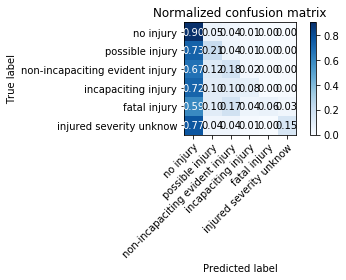

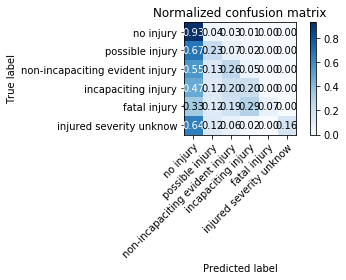

In [48]:
y_pred = knn.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

#plot_confusion_matrix(y_test, y_pred, labels)
plot_confusion_matrix(y_test, y_pred, labels, normalize=True)
plot_confusion_matrix(y_test, y_pred_scaled, labels, normalize=True)

## Grid Search

### we could define a custom distance function between two points
### should be something like x = {0-5} and d = {x_t - x} except for 5 (it could be reframed to 2 between 'possible injury' and 'non-incapaciting')

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


## complexity in x*y*z = 9*2*2 = 36 * 3 cv = 108 * 2 with or without scale

grid_params = {
    'n_neighbors': [1, 2, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), 
                  grid_params,
                  verbose=2,
                  cv=3, n_jobs=-1)

gs_results = gs.fit(X_train, y_train)
print('without scaler')
print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.0s


without scaler
0.698020902824105
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   43.7s finished


In [15]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

gs_scaled = GridSearchCV(KNeighborsClassifier(), 
                         grid_params,
                         verbose=2,
                         cv=3, n_jobs=-1)

gs_scaled_results = gs_scaled.fit(X_train_scaled, y_train)
print('with scaler')
print(gs_scaled_results.best_score_)
print(gs_scaled_results.best_estimator_)
print(gs_scaled_results.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 28.6min finished


with scaler
0.7205544437032095
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')
{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


## using the best

In [0]:
best_knn = KNeighborsClassifier(
    algorithm='auto', leaf_size=30, metric='manhattan',
    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
    weights='distance')

best_knn.fit(X_train_scaled, y_train)
y_pred_scaled = best_knn.predict(X_test_scaled)

Normalized confusion matrix
[[9.43216855e-01 2.58221994e-02 2.37667009e-02 7.06577595e-03
  0.00000000e+00 1.28468654e-04]
 [6.16136919e-01 2.78117359e-01 7.21271394e-02 3.30073350e-02
  0.00000000e+00 6.11246944e-04]
 [5.06766917e-01 9.24812030e-02 3.31578947e-01 6.91729323e-02
  0.00000000e+00 0.00000000e+00]
 [3.86792453e-01 9.11949686e-02 1.90251572e-01 3.17610063e-01
  1.25786164e-02 1.57232704e-03]
 [2.31884058e-01 1.15942029e-01 1.59420290e-01 2.75362319e-01
  2.02898551e-01 1.44927536e-02]
 [5.04587156e-01 1.10091743e-01 3.66972477e-02 2.75229358e-02
  0.00000000e+00 3.21100917e-01]]


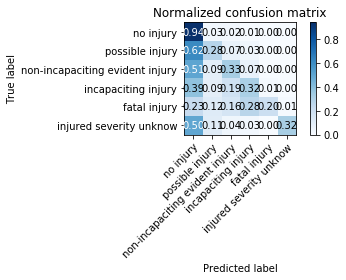

In [21]:
#plot_confusion_matrix(y_test, y_pred, labels, normalize=True)
plot_confusion_matrix(y_test, y_pred_scaled, labels, normalize=True)

### metrics
#### sklearn computes acc & micro precision equivaly

In [28]:
from sklearn.metrics import accuracy_score, precision_score

# acc
#print('acc flat', accuracy_score(y_test, y_pred))
print('acc scaled', accuracy_score(y_test, y_pred_scaled))
# avg
#print('avg flat', precision_score(y_test, y_pred, average='macro'))
print('avg scaled', precision_score(y_test, y_pred_scaled, average='micro'))

acc scaled 0.7340885506745071
avg scaled 0.7340885506745071
